# Fire Historical Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import sqlite3
import sqlalchemy as sqla
import scipy.stats as st
from scipy.stats import linregress


## Import Data
Make sure that CSVs have been created in `Resources` directory prior to running

In [2]:
fire_data = pd.read_csv('./Resources/Fires.csv', dtype={'FIPS_NAME': 'str',
                                                        'COMPLEX_NAME': 'str',
                                                        'FIRE_NAME': 'str',
                                                        'FIRE_CODE': 'str',
                                                        'DISCOVERY_TIME': 'str',
                                                        'CONT_TIME': 'str'
                                                       })
fire_data.head()

,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME
0,1,1,FS-1418826,2005,Plumas,NaN,FOUNTAIN,0.10,2453403.5,BJ8K,Miscellaneous,2453403.5,CA,40.036944,-121.005833,1300,1730
1,2,2,FS-1418827,2004,Placer,NaN,PIGEON,0.25,2453137.5,AAC0,Lightning,2453137.5,CA,38.933056,-120.404444,0845,1530
2,3,3,FS-1418835,2004,El Dorado,NaN,SLACK,0.10,2453156.5,A32W,Debris Burning,2453156.5,CA,38.984167,-120.735556,1921,2024
3,4,4,FS-1418845,2004,Alpine,NaN,DEER,0.10,2453184.5,NaN,Lightning,2453189.5,CA,38.559167,-119.913333,1600,1400
4,5,5,FS-1418847,2004,Alpine,NaN,STEVENOT,0.10,2453184.5,NaN,Lightning,2453189.5,CA,38.559167,-119.933056,1600,1200


## National Analysis

### Fire Causes

In [3]:
#pie chart by fire cause
cause = fire_data.groupby("STAT_CAUSE_DESCR")
cause = cause.count()
cause = cause[["OBJECTID"]]
cause = cause.rename(columns = {"OBJECTID": "Number of Fires"})
cause = cause.sort_values(by=['Number of Fires'])
cause

,Number of Fires
STAT_CAUSE_DESCR,
Structure,3796
Fireworks,11500
Powerline,14448
Railroad,33455
Smoking,52869
Children,61167
Campfire,76139
Equipment Use,147612
Missing/Undefined,166723


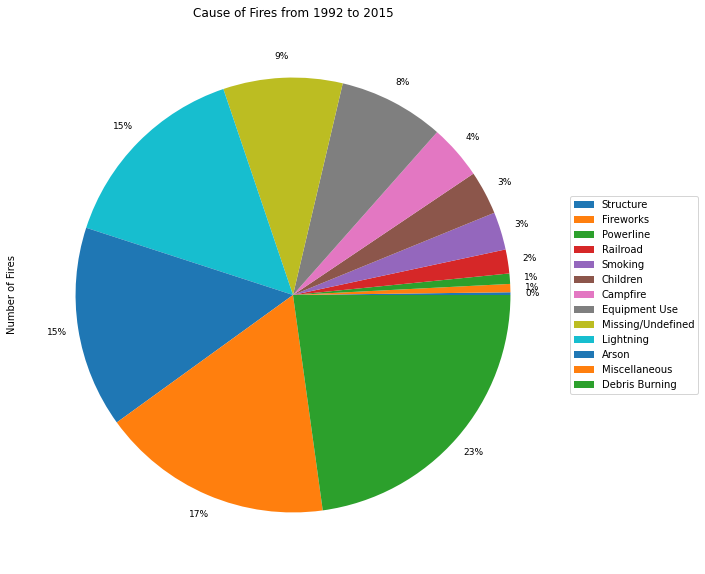

In [4]:
pie_cause = cause.plot(kind = "pie", y="Number of Fires", labeldistance = None, figsize=(20,10), fontsize=9, autopct='%1.0f%%', pctdistance=1.1, title= "Cause of Fires from 1992 to 2015")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("output/Figure1")

plt.show()

### Total Number of Fires By Year

In [5]:
#Number of Fires
fire_num = fire_data[["FIRE_YEAR", "OBJECTID"]]
yearly_fire_num = fire_num.groupby(["FIRE_YEAR"])
counted_fire = yearly_fire_num.count() 
counted_fire = counted_fire.rename(columns = {"OBJECTID": "Number of Fires"})
counted_fire

,Number of Fires
FIRE_YEAR,
1992,67975
1993,61989
1994,75955
1995,71472
1996,75574
1997,61450
1998,68370
1999,89363
2000,96416


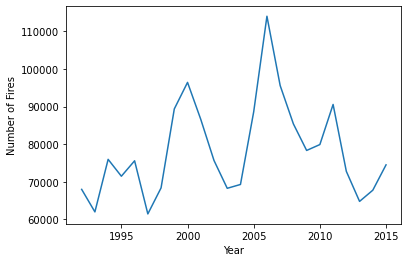

In [6]:
ax = counted_fire.plot.line()
plt.xlabel('Year')
plt.ylabel('Number of Fires')
ax.get_legend().remove()
plt.savefig("output/Figure2")

### Average Fire Size By Year

In [7]:
#Average fire size per year
fire_size = fire_data[["FIRE_YEAR", "FIRE_SIZE"]]
aver_fire_year = fire_size.groupby(["FIRE_YEAR"]).mean()
aver_fire_year=aver_fire_year.rename(columns = {"FIRE_SIZE": "Average Fire Size (Acres)"})
aver_fire_year

,Average Fire Size (Acres)
FIRE_YEAR,
1992,32.364222
1993,35.356208
1994,54.198875
1995,28.676755
1996,79.460604
1997,52.313024
1998,29.414983
1999,68.039342
2000,79.234760


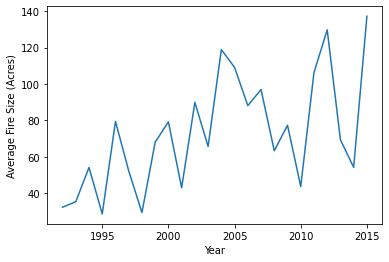

In [8]:
ax2 = aver_fire_year.plot.line()
plt.xlabel('Year')
plt.ylabel('Average Fire Size (Acres)')
ax2.get_legend().remove()
plt.savefig("output/Figure3")

### Total Acres Burned By Year

In [9]:
#Sum of Acres per year
total_acre= fire_size.groupby(["FIRE_YEAR"]).sum()
total_acre =total_acre.rename(columns = {"FIRE_SIZE": "Total Fire Size (Acres)"})
total_acre 

,Total Fire Size (Acres)
FIRE_YEAR,
1992,2.199958e+06
1993,2.191696e+06
1994,4.116676e+06
1995,2.049585e+06
1996,6.005156e+06
1997,3.214635e+06
1998,2.011102e+06
1999,6.080200e+06
2000,7.639499e+06


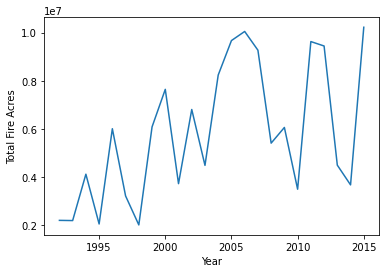

In [10]:
ax3 = total_acre.plot.line()
plt.xlabel('Year')
plt.ylabel('Total Fire Acres')
ax3.get_legend().remove()
plt.savefig("output/Figure4")

### Average Fire Size Vs Total Number of Fires

In [11]:
#merged doc, I wanted to see if there was any correlation between average fire size and number of fires. I dont think I found anything interesting
merged1= pd.merge(total_acre, aver_fire_year, on ="FIRE_YEAR")
merged2 = pd.merge(merged1, counted_fire, on ="FIRE_YEAR")
merged2

,Total Fire Size (Acres),Average Fire Size (Acres),Number of Fires
FIRE_YEAR,,,
1992,2.199958e+06,32.364222,67975
1993,2.191696e+06,35.356208,61989
1994,4.116676e+06,54.198875,75955
1995,2.049585e+06,28.676755,71472
1996,6.005156e+06,79.460604,75574
1997,3.214635e+06,52.313024,61450
1998,2.011102e+06,29.414983,68370
1999,6.080200e+06,68.039342,89363
2000,7.639499e+06,79.234760,96416


<AxesSubplot:title={'center':'Fire Count verus Acres'}, xlabel='Average Fire Size (Acres)', ylabel='Number of Fires'>

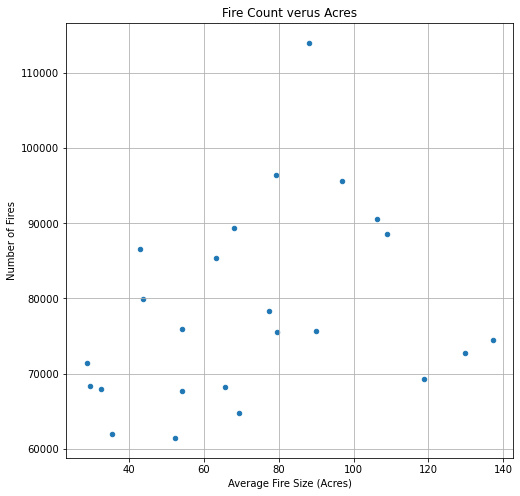

In [12]:
merged2.plot(kind="scatter", x="Average Fire Size (Acres)", y="Number of Fires", grid=True, figsize=(8,8),
              title="Fire Count verus Acres")


### Total Fires by State

In [13]:
#fire by state bar chart
fire_state = fire_data[["STATE", "OBJECTID"]]
state_count = fire_state.groupby(["STATE"]).count()
state_count

,OBJECTID
STATE,
AK,12843
AL,66570
AR,31663
AZ,71586
CA,189550
CO,34157
CT,4976
DC,66
DE,171


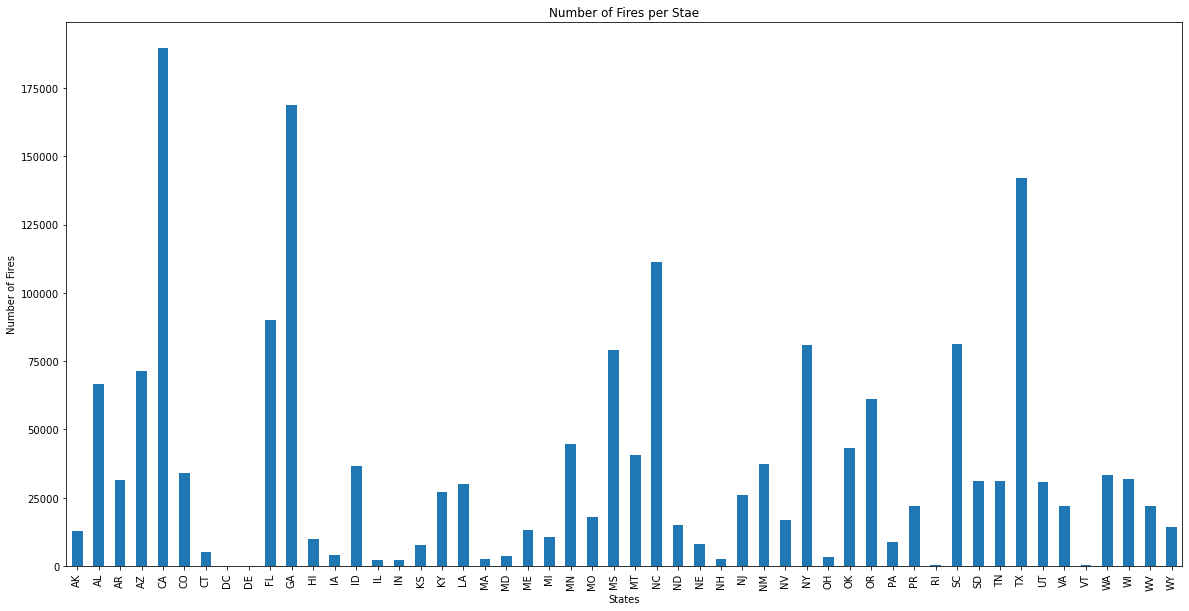

In [14]:
fire_bar = state_count.plot(kind = "bar", y="OBJECTID", figsize=(20,10), title= "Number of Fires per Stae")

plt.xlabel('States')
plt.ylabel('Number of Fires')
fire_bar.get_legend().remove()
plt.savefig("output/Figure5")
plt.show()


## California Analysis

In [15]:
#data frame specific to california data
cal_fire = fire_data.loc[fire_data["STATE"] == "CA", :]
cal_fire

,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME
0,1,1,FS-1418826,2005,Plumas,NaN,FOUNTAIN,0.10,2453403.5,BJ8K,Miscellaneous,2453403.5,CA,40.036944,-121.005833,1300,1730
1,2,2,FS-1418827,2004,Placer,NaN,PIGEON,0.25,2453137.5,AAC0,Lightning,2453137.5,CA,38.933056,-120.404444,0845,1530
2,3,3,FS-1418835,2004,El Dorado,NaN,SLACK,0.10,2453156.5,A32W,Debris Burning,2453156.5,CA,38.984167,-120.735556,1921,2024
3,4,4,FS-1418845,2004,Alpine,NaN,DEER,0.10,2453184.5,NaN,Lightning,2453189.5,CA,38.559167,-119.913333,1600,1400
4,5,5,FS-1418847,2004,Alpine,NaN,STEVENOT,0.10,2453184.5,NaN,Lightning,2453189.5,CA,38.559167,-119.933056,1600,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,2015,NaN,NaN,ODESSA 2,0.01,2457291.5,NaN,Missing/Undefined,2457291.5,CA,40.481637,-122.389375,1726,1843
1880461,1880462,300348373,2015CAIRS29217935,2015,NaN,NaN,NaN,0.20,2457300.5,NaN,Miscellaneous,NaN,CA,37.617619,-120.938570,0126,NaN
1880462,1880463,300348375,2015CAIRS28364460,2015,NaN,NaN,NaN,0.10,2457144.5,NaN,Missing/Undefined,NaN,CA,37.617619,-120.938570,2052,NaN
1880463,1880464,300348377,2015CAIRS29218079,2015,NaN,NaN,NaN,2.00,2457309.5,NaN,Missing/Undefined,NaN,CA,37.672235,-120.898356,2309,NaN


### Total Number of Fires By Year In California

In [16]:
#I start doing same charts all over again here
fire_num = cal_fire[["FIRE_YEAR", "OBJECTID"]]
yearly_fire_num = fire_num.groupby(["FIRE_YEAR"])
cal_counted_fire = yearly_fire_num.count() 
cal_counted_fire = cal_counted_fire.rename(columns = {"OBJECTID": "Number of Fires"})
cal_counted_fire

,Number of Fires
FIRE_YEAR,
1992,10833
1993,8270
1994,8654
1995,7381
1996,9173
1997,7930
1998,6864
1999,8910
2000,6977


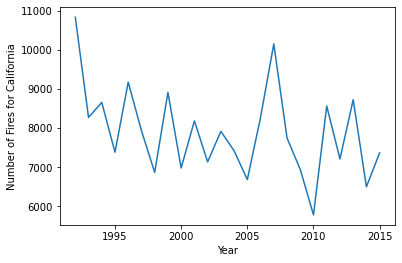

In [17]:
ax = cal_counted_fire.plot.line()

plt.xlabel('Year')
plt.ylabel('Number of Fires for California')
ax.get_legend().remove()
plt.savefig("output/Figure6")
plt.show()

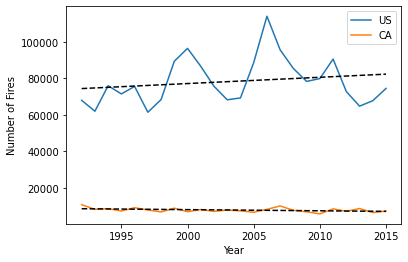

In [18]:
merged = pd.merge(counted_fire, cal_counted_fire, how='left', on="FIRE_YEAR")
merged = merged.fillna(0)
merged = merged.rename(columns = {"Number of Fires_x": "US"})
merged = merged.rename(columns = {"Number of Fires_y": "CA"})

ax5 = merged.plot.line()

Y1 = merged["US"]
Y2 = merged["CA"]
X = merged.index

(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y1)
regress_values = X * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X,regress_values,'--k')

(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y2)
regress_values = X * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X,regress_values,"--k")

plt.xlabel('Year')
plt.ylabel('Number of Fires')



plt.savefig("output/Figure12")

### Average Fire Size By Year In California

In [19]:
fire_size = cal_fire[["FIRE_YEAR", "FIRE_SIZE"]]
cal_aver_fire_year = fire_size.groupby(["FIRE_YEAR"]).mean()
cal_aver_fire_year=cal_aver_fire_year.rename(columns = {"FIRE_SIZE": "Average Fire Size (Acres)"})
cal_aver_fire_year

,Average Fire Size (Acres)
FIRE_YEAR,
1992,27.364516
1993,38.874885
1994,47.139438
1995,29.273635
1996,77.086068
1997,40.928916
1998,23.311932
1999,90.249540
2000,36.215565


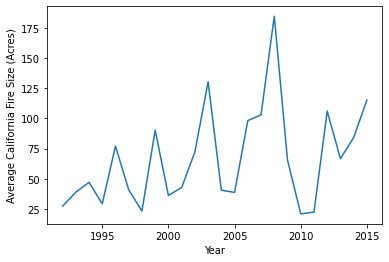

In [20]:
ax2 = cal_aver_fire_year.plot.line()
plt.xlabel('Year')
plt.ylabel('Average California Fire Size (Acres)')
ax2.get_legend().remove()
plt.savefig("output/Figure8")
plt.show()

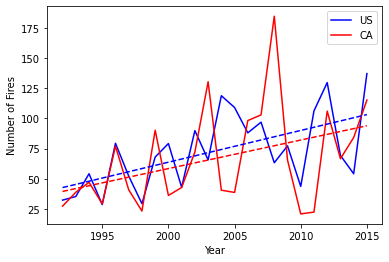

In [21]:
merged = pd.merge(aver_fire_year, cal_aver_fire_year, how='left', on="FIRE_YEAR")
merged = merged.fillna(0)
merged = merged.rename(columns = {"Average Fire Size (Acres)_x": "US"})
merged = merged.rename(columns = {"Average Fire Size (Acres)_y": "CA"})

ax5 = merged.plot.line(color={"US": "blue", "CA": "red"})

Y1 = merged["US"]
Y2 = merged["CA"]
X = merged.index

(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y1)
regress_values = X * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X,regress_values,'--b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y2)
regress_values = X * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X,regress_values,"--r")

plt.xlabel('Year')
plt.ylabel('Number of Fires')



plt.savefig("output/Figure13")

### Total Acres Burned By Year In California

In [22]:
total_acre = fire_size.groupby(["FIRE_YEAR"]).sum()
total_acre =total_acre.rename(columns = {"FIRE_SIZE": "Total Fire Size (Acres)"})
total_acre 

,Total Fire Size (Acres)
FIRE_YEAR,
1992,296439.800
1993,321495.300
1994,407944.700
1995,216068.700
1996,707110.500
1997,324566.300
1998,160013.100
1999,804123.400
2000,252676.000


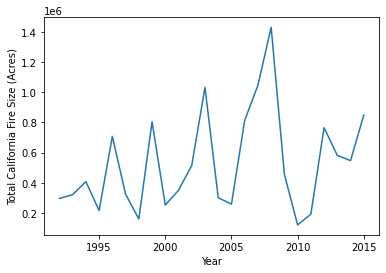

In [23]:
ax3 = total_acre.plot.line()
plt.xlabel('Year')
plt.ylabel('Total California Fire Size (Acres)')
ax3.get_legend().remove()
plt.savefig("output/Figure9")

In [25]:
#I start coverting to dates and time here

#drop NaN rows
cleaned_fire_data = fire_data.dropna(inplace = False)

#covert julian dates to Year-month-day
# cleaned_fire_data['Start Date'] = (pd.to_datetime((cleaned_fire_data.DISCOVERY_DATE // 1000).astype(int)) + 
#                  pd.to_timedelta(cleaned_fire_data.DISCOVERY_DATE % 1000, unit='D'))
# cleaned_fire_data['End Date'] = (pd.to_datetime((cleaned_fire_data.CONT_DATE // 1000).astype(int)) + 
#                  pd.to_timedelta(cleaned_fire_data.CONT_DATE % 1000, unit='D'))

cleaned_fire_data['Start Date'] = pd.to_datetime(cleaned_fire_data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
cleaned_fire_data['End Date'] = pd.to_datetime(cleaned_fire_data['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

#Just get date
# cleaned_fire_data["Start Date"] = pd.DatetimeIndex(cleaned_fire_data['Start Date']).date
# cleaned_fire_data["End Date"] = pd.DatetimeIndex(cleaned_fire_data['End Date']).date

cleaned_fire_data

<ipython-input-25-8a572a46f523>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data['Start Date'] = pd.to_datetime(cleaned_fire_data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
<ipython-input-25-8a572a46f523>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data['End Date'] = pd.to_datetime(cleaned_fire_data['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')


,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME,Start Date,End Date
186,187,190,FS-1419311,2005,Gila,THREE FIRE COMPLEX,BACHELOR,2.0,2453542.5,BEY6,Lightning,2453542.5,AZ,33.716111,-111.217778,1400,1600,2005-06-21,2005-06-21
188,189,192,FS-1419313,2005,Gila,THREE FIRE COMPLEX,THREE,16100.0,2453542.5,BVR2,Lightning,2453550.5,AZ,33.723333,-111.275000,1400,1800,2005-06-21,2005-06-29
918,919,931,FS-1420879,2005,Bonner,GOLDILOCKS COMPLEX,GOLDILOCKS COMPLEX,0.1,2453591.5,B3TY,Campfire,2453591.5,ID,48.791667,-117.030278,1600,1825,2005-08-09,2005-08-09
1505,1506,1520,FS-1422195,2005,Catron,NORTH GILA COMPLEX,FORK,11936.0,2453519.5,BS5G,Lightning,2453611.5,NM,33.613333,-108.558889,1505,1159,2005-05-29,2005-08-29
1888,1889,1904,FS-1422958,2005,Lawrence,SOUTH SUNDANCE COMPLEX,ALLISON,32.0,2453574.5,BEW6,Lightning,2453577.5,SD,44.465000,-104.001389,1200,1700,2005-07-23,2005-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804864,1804865,300218362,FWS-2015USAKYDRJUQ9,2015,Bethel,ANIAK COMPLEX,15547 NORTH ANIAK,55704.0,2457195.5,JUQ9,Lightning,2457203.5,AK,61.650000,-159.650000,2000,2345,2015-06-22,2015-06-30
1804874,1804875,300218373,FWS-2015USGAOKRJS7D,2015,Charlton,COWHOUSE COMPLEX,SILL,58.0,2457192.5,JS7D,Lightning,2457195.5,GA,30.827500,-82.414833,1430,1500,2015-06-19,2015-06-22
1804889,1804890,300218389,FWS-2015USAKNORJT4S,2015,Yukon-Koyukuk,MIDDLE YUKON FIRES COMPLEX,15601 LOST RIVER,52108.5,2457196.5,JT4S,Lightning,2457213.5,AK,64.366100,-154.758600,1900,1845,2015-06-23,2015-07-10
1804896,1804897,300218397,FWS-2015USGAOKRJSQ0,2015,Ware,COWHOUSE COMPLEX,COWHOUSE 1,4.3,2457187.5,JSQ0,Lightning,2457187.5,GA,31.055425,-82.260437,1430,1700,2015-06-14,2015-06-14


In [26]:
cleaned_fire_data["Start Month"] = pd.DatetimeIndex(cleaned_fire_data['Start Date']).month
cleaned_fire_data

<ipython-input-26-04a9a5da7383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data["Start Month"] = pd.DatetimeIndex(cleaned_fire_data['Start Date']).month


,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME,Start Date,End Date,Start Month
186,187,190,FS-1419311,2005,Gila,THREE FIRE COMPLEX,BACHELOR,2.0,2453542.5,BEY6,Lightning,2453542.5,AZ,33.716111,-111.217778,1400,1600,2005-06-21,2005-06-21,6
188,189,192,FS-1419313,2005,Gila,THREE FIRE COMPLEX,THREE,16100.0,2453542.5,BVR2,Lightning,2453550.5,AZ,33.723333,-111.275000,1400,1800,2005-06-21,2005-06-29,6
918,919,931,FS-1420879,2005,Bonner,GOLDILOCKS COMPLEX,GOLDILOCKS COMPLEX,0.1,2453591.5,B3TY,Campfire,2453591.5,ID,48.791667,-117.030278,1600,1825,2005-08-09,2005-08-09,8
1505,1506,1520,FS-1422195,2005,Catron,NORTH GILA COMPLEX,FORK,11936.0,2453519.5,BS5G,Lightning,2453611.5,NM,33.613333,-108.558889,1505,1159,2005-05-29,2005-08-29,5
1888,1889,1904,FS-1422958,2005,Lawrence,SOUTH SUNDANCE COMPLEX,ALLISON,32.0,2453574.5,BEW6,Lightning,2453577.5,SD,44.465000,-104.001389,1200,1700,2005-07-23,2005-07-26,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804864,1804865,300218362,FWS-2015USAKYDRJUQ9,2015,Bethel,ANIAK COMPLEX,15547 NORTH ANIAK,55704.0,2457195.5,JUQ9,Lightning,2457203.5,AK,61.650000,-159.650000,2000,2345,2015-06-22,2015-06-30,6
1804874,1804875,300218373,FWS-2015USGAOKRJS7D,2015,Charlton,COWHOUSE COMPLEX,SILL,58.0,2457192.5,JS7D,Lightning,2457195.5,GA,30.827500,-82.414833,1430,1500,2015-06-19,2015-06-22,6
1804889,1804890,300218389,FWS-2015USAKNORJT4S,2015,Yukon-Koyukuk,MIDDLE YUKON FIRES COMPLEX,15601 LOST RIVER,52108.5,2457196.5,JT4S,Lightning,2457213.5,AK,64.366100,-154.758600,1900,1845,2015-06-23,2015-07-10,6
1804896,1804897,300218397,FWS-2015USGAOKRJSQ0,2015,Ware,COWHOUSE COMPLEX,COWHOUSE 1,4.3,2457187.5,JSQ0,Lightning,2457187.5,GA,31.055425,-82.260437,1430,1700,2015-06-14,2015-06-14,6


In [27]:
time_strs = cleaned_fire_data["DISCOVERY_TIME"].astype(str).str.zfill(4)
cleaned_fire_data["DISCOVERY_TIME"] = pd.to_datetime(time_strs, format="%H%M")


time_strs2 = cleaned_fire_data["CONT_TIME"].astype(str).str.zfill(4)
cleaned_fire_data["CONT_TIME"] = pd.to_datetime(time_strs2, format="%H%M")

cleaned_fire_data["DISCOVERY_TIME"] = pd.DatetimeIndex(cleaned_fire_data['DISCOVERY_TIME']).time
cleaned_fire_data["CONT_TIME"] = pd.DatetimeIndex(cleaned_fire_data['CONT_TIME']).time
cleaned_fire_data.head()

<ipython-input-27-46ce30b3f4fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data["DISCOVERY_TIME"] = pd.to_datetime(time_strs, format="%H%M")
<ipython-input-27-46ce30b3f4fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data["CONT_TIME"] = pd.to_datetime(time_strs2, format="%H%M")
<ipython-input-27-46ce30b3f4fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME,Start Date,End Date,Start Month
186,187,190,FS-1419311,2005,Gila,THREE FIRE COMPLEX,BACHELOR,2.0,2453542.5,BEY6,Lightning,2453542.5,AZ,33.716111,-111.217778,14:00:00,16:00:00,2005-06-21,2005-06-21,6
188,189,192,FS-1419313,2005,Gila,THREE FIRE COMPLEX,THREE,16100.0,2453542.5,BVR2,Lightning,2453550.5,AZ,33.723333,-111.275000,14:00:00,18:00:00,2005-06-21,2005-06-29,6
918,919,931,FS-1420879,2005,Bonner,GOLDILOCKS COMPLEX,GOLDILOCKS COMPLEX,0.1,2453591.5,B3TY,Campfire,2453591.5,ID,48.791667,-117.030278,16:00:00,18:25:00,2005-08-09,2005-08-09,8
1505,1506,1520,FS-1422195,2005,Catron,NORTH GILA COMPLEX,FORK,11936.0,2453519.5,BS5G,Lightning,2453611.5,NM,33.613333,-108.558889,15:05:00,11:59:00,2005-05-29,2005-08-29,5
1888,1889,1904,FS-1422958,2005,Lawrence,SOUTH SUNDANCE COMPLEX,ALLISON,32.0,2453574.5,BEW6,Lightning,2453577.5,SD,44.465000,-104.001389,12:00:00,17:00:00,2005-07-23,2005-07-26,7


In [28]:
#adding times to dates
cleaned_fire_data["Start Date"] = cleaned_fire_data.apply(lambda r : pd.datetime.combine(r['Start Date'],r['DISCOVERY_TIME']),1)
cleaned_fire_data["End Date"] = cleaned_fire_data.apply(lambda r : pd.datetime.combine(r['End Date'],r['CONT_TIME']),1)
cleaned_fire_data.head()

<ipython-input-28-148236067804>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  cleaned_fire_data["Start Date"] = cleaned_fire_data.apply(lambda r : pd.datetime.combine(r['Start Date'],r['DISCOVERY_TIME']),1)
<ipython-input-28-148236067804>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data["Start Date"] = cleaned_fire_data.apply(lambda r : pd.datetime.combine(r['Start Date'],r['DISCOVERY_TIME']),1)
<ipython-input-28-148236067804>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  cleaned_fire_data["End Date"] = cleaned_fire_data.app

,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME,Start Date,End Date,Start Month
186,187,190,FS-1419311,2005,Gila,THREE FIRE COMPLEX,BACHELOR,2.0,2453542.5,BEY6,Lightning,2453542.5,AZ,33.716111,-111.217778,14:00:00,16:00:00,2005-06-21 14:00:00,2005-06-21 16:00:00,6
188,189,192,FS-1419313,2005,Gila,THREE FIRE COMPLEX,THREE,16100.0,2453542.5,BVR2,Lightning,2453550.5,AZ,33.723333,-111.275000,14:00:00,18:00:00,2005-06-21 14:00:00,2005-06-29 18:00:00,6
918,919,931,FS-1420879,2005,Bonner,GOLDILOCKS COMPLEX,GOLDILOCKS COMPLEX,0.1,2453591.5,B3TY,Campfire,2453591.5,ID,48.791667,-117.030278,16:00:00,18:25:00,2005-08-09 16:00:00,2005-08-09 18:25:00,8
1505,1506,1520,FS-1422195,2005,Catron,NORTH GILA COMPLEX,FORK,11936.0,2453519.5,BS5G,Lightning,2453611.5,NM,33.613333,-108.558889,15:05:00,11:59:00,2005-05-29 15:05:00,2005-08-29 11:59:00,5
1888,1889,1904,FS-1422958,2005,Lawrence,SOUTH SUNDANCE COMPLEX,ALLISON,32.0,2453574.5,BEW6,Lightning,2453577.5,SD,44.465000,-104.001389,12:00:00,17:00:00,2005-07-23 12:00:00,2005-07-26 17:00:00,7


In [29]:
#getting to time burning
cleaned_fire_data["Days_Lasted"] = cleaned_fire_data["End Date"] - cleaned_fire_data["Start Date"]

cleaned_fire_data['Total Minutes'] = cleaned_fire_data['Days_Lasted'].dt.total_seconds().div(60).astype(int)
cleaned_fire_data

<ipython-input-29-67953a8e99f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data["Days_Lasted"] = cleaned_fire_data["End Date"] - cleaned_fire_data["Start Date"]
<ipython-input-29-67953a8e99f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_fire_data['Total Minutes'] = cleaned_fire_data['Days_Lasted'].dt.total_seconds().div(60).astype(int)


,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,...,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME,Start Date,End Date,Start Month,Days_Lasted,Total Minutes
186,187,190,FS-1419311,2005,Gila,THREE FIRE COMPLEX,BACHELOR,2.0,2453542.5,BEY6,...,AZ,33.716111,-111.217778,14:00:00,16:00:00,2005-06-21 14:00:00,2005-06-21 16:00:00,6,0 days 02:00:00,120
188,189,192,FS-1419313,2005,Gila,THREE FIRE COMPLEX,THREE,16100.0,2453542.5,BVR2,...,AZ,33.723333,-111.275000,14:00:00,18:00:00,2005-06-21 14:00:00,2005-06-29 18:00:00,6,8 days 04:00:00,11760
918,919,931,FS-1420879,2005,Bonner,GOLDILOCKS COMPLEX,GOLDILOCKS COMPLEX,0.1,2453591.5,B3TY,...,ID,48.791667,-117.030278,16:00:00,18:25:00,2005-08-09 16:00:00,2005-08-09 18:25:00,8,0 days 02:25:00,145
1505,1506,1520,FS-1422195,2005,Catron,NORTH GILA COMPLEX,FORK,11936.0,2453519.5,BS5G,...,NM,33.613333,-108.558889,15:05:00,11:59:00,2005-05-29 15:05:00,2005-08-29 11:59:00,5,91 days 20:54:00,132294
1888,1889,1904,FS-1422958,2005,Lawrence,SOUTH SUNDANCE COMPLEX,ALLISON,32.0,2453574.5,BEW6,...,SD,44.465000,-104.001389,12:00:00,17:00:00,2005-07-23 12:00:00,2005-07-26 17:00:00,7,3 days 05:00:00,4620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804864,1804865,300218362,FWS-2015USAKYDRJUQ9,2015,Bethel,ANIAK COMPLEX,15547 NORTH ANIAK,55704.0,2457195.5,JUQ9,...,AK,61.650000,-159.650000,20:00:00,23:45:00,2015-06-22 20:00:00,2015-06-30 23:45:00,6,8 days 03:45:00,11745
1804874,1804875,300218373,FWS-2015USGAOKRJS7D,2015,Charlton,COWHOUSE COMPLEX,SILL,58.0,2457192.5,JS7D,...,GA,30.827500,-82.414833,14:30:00,15:00:00,2015-06-19 14:30:00,2015-06-22 15:00:00,6,3 days 00:30:00,4350
1804889,1804890,300218389,FWS-2015USAKNORJT4S,2015,Yukon-Koyukuk,MIDDLE YUKON FIRES COMPLEX,15601 LOST RIVER,52108.5,2457196.5,JT4S,...,AK,64.366100,-154.758600,19:00:00,18:45:00,2015-06-23 19:00:00,2015-07-10 18:45:00,6,16 days 23:45:00,24465
1804896,1804897,300218397,FWS-2015USGAOKRJSQ0,2015,Ware,COWHOUSE COMPLEX,COWHOUSE 1,4.3,2457187.5,JSQ0,...,GA,31.055425,-82.260437,14:30:00,17:00:00,2015-06-14 14:30:00,2015-06-14 17:00:00,6,0 days 02:30:00,150


In [30]:
#Group by month
# fire_num = cleaned_fire_data[["Start Month", "FIRE_SIZE"]]
fire_num = cleaned_fire_data[["Start Month", "Total Minutes"]]
yearly_fire_num = fire_num.groupby(["Start Month"])
sum_fire_time = yearly_fire_num.sum() 
sum_fire_time

,Total Minutes
Start Month,
1,4814
2,3165
3,42602
4,188102
5,914845
6,12315776
7,33461673
8,44337934
9,4805510


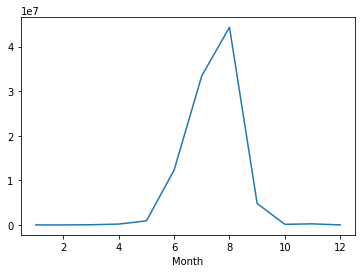

In [31]:
#Total minutes
ax4 = sum_fire_time.plot.line()
plt.xlabel('Month')
# plt.ylabel('Total Time All Fires Burned (minutes)')
ax4.get_legend().remove()

In [48]:
#total time burning per year
fire_num = cleaned_fire_data[["FIRE_YEAR", "Total Minutes"]]
yearly_fire_num = fire_num.groupby(["FIRE_YEAR"])
sum_fire_time = yearly_fire_num.sum() 
sum_fire_time

,Total Minutes
FIRE_YEAR,
1998,210
1999,1026862
2000,2095050
2001,1017351
2002,3434720
2003,9440574
2004,727387
2005,10310565
2006,9830647


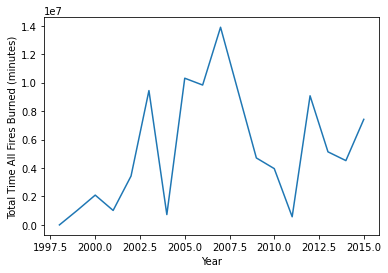

In [54]:

#Total minutes
ax4 = sum_fire_time.plot.line()


plt.xlabel('Year')
plt.ylabel('Total Time All Fires Burned (minutes)')
ax4.get_legend().remove()
# plt.savefig("output/Figure9")

In [34]:
#total time burning per year
cal_minute = cleaned_fire_data.loc[cleaned_fire_data["STATE"]== "CA", :]
fire_num = cal_minute[["FIRE_YEAR", "Total Minutes"]]
yearly_fire_num = fire_num.groupby(["FIRE_YEAR"])
cal_sum_fire_time = yearly_fire_num.sum() 


cal_sum_fire_time

,Total Minutes
FIRE_YEAR,
1999,151581
2000,34760
2002,26460
2003,9704
2004,10170
2006,1674637
2007,826403
2008,7724538
2009,679359


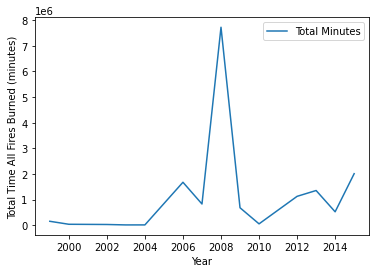

In [35]:
#Total minutes
ax4 = cal_sum_fire_time.plot.line()
plt.xlabel('Year')
plt.ylabel('Total Time All Fires Burned (minutes)')
ax4.get_legend().remove
plt.savefig("output/Figure10")

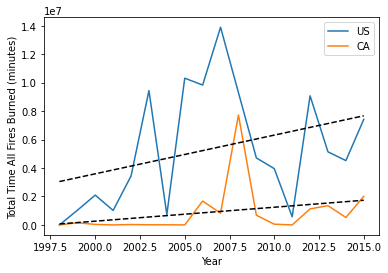

In [47]:
merged = pd.merge(sum_fire_time, cal_sum_fire_time, how='left', on="FIRE_YEAR")
merged = merged.fillna(0)
merged = merged.rename(columns = {"Total Minutes_x": "US"})
merged = merged.rename(columns = {"Total Minutes_y": "CA"})

ax5 = merged.plot.line()

Y1 = merged["US"]
Y2 = merged["CA"]
X = merged.index

(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y1)
regress_values = X * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X,regress_values,'--k')

(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y2)
regress_values = X * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(X,regress_values,"--k")

plt.xlabel('Year')
plt.ylabel('Total Time All Fires Burned (minutes)')



plt.savefig("output/Figure11")

The correlation between size and time is 0.12


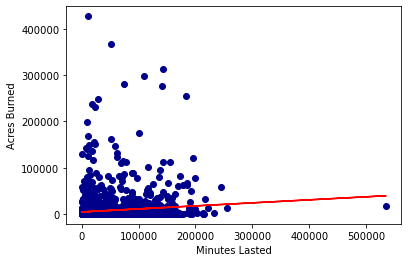

In [37]:
minutes_last = cleaned_fire_data["Total Minutes"]
fire_size = cleaned_fire_data["FIRE_SIZE"]
plt.scatter(x = minutes_last, y = fire_size, c = "DarkBlue")


correlation = st.pearsonr(minutes_last,fire_size)
print(f"The correlation between size and time is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(minutes_last,fire_size)
regress_values = minutes_last * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(minutes_last,regress_values,"r-")

plt.xlabel('Minutes Lasted')
plt.ylabel('Acres Burned')
plt.savefig("output/Figure12")

In [ ]:
minutes_last = cleaned_fire_data["Total Minutes"]
fire_size = cleaned_fire_data["FIRE_SIZE"]
plt.scatter(x = minutes_last, y = fire_size, c = "DarkBlue")


correlation = st.pearsonr(minutes_last,fire_size)
print(f"The correlation between size and time is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(minutes_last,fire_size)
regress_values = minutes_last * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(minutes_last,regress_values,"r-")

plt.xlabel('Minutes Lasted')
plt.ylabel('Acres Burned')
plt.savefig("output/Figure12")